In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [6]:
df = pd.read_csv('../data/spotify_data.csv', index_col=0)
df.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [7]:
df.shape

(1159764, 19)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1159764 entries, 0 to 1473395
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   artist_name       1159749 non-null  object 
 1   track_name        1159763 non-null  object 
 2   track_id          1159764 non-null  object 
 3   popularity        1159764 non-null  int64  
 4   year              1159764 non-null  int64  
 5   genre             1159764 non-null  object 
 6   danceability      1159764 non-null  float64
 7   energy            1159764 non-null  float64
 8   key               1159764 non-null  int64  
 9   loudness          1159764 non-null  float64
 10  mode              1159764 non-null  int64  
 11  speechiness       1159764 non-null  float64
 12  acousticness      1159764 non-null  float64
 13  instrumentalness  1159764 non-null  float64
 14  liveness          1159764 non-null  float64
 15  valence           1159764 non-null  float64
 16  tempo

/Users/wesleyallen/anaconda3/envs/CSCI_5502/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Number of Songs')

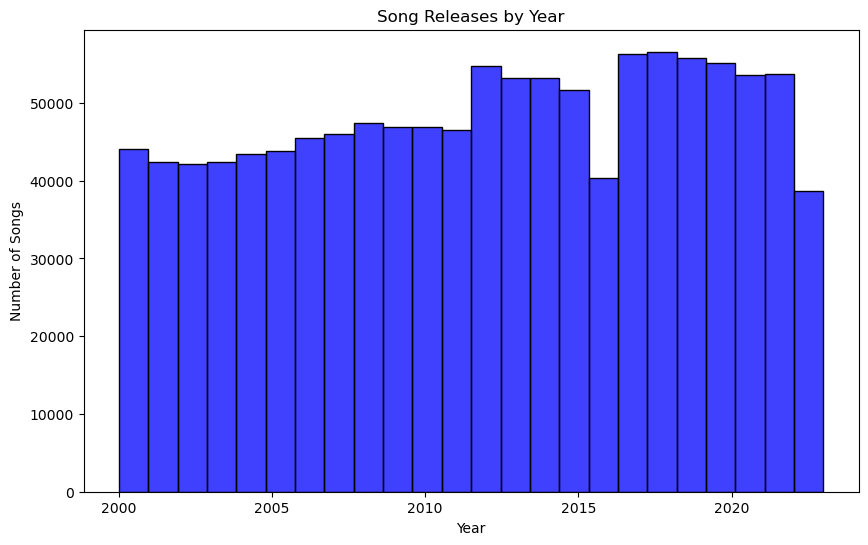

In [10]:
# create histogram of song releases by year

plt.figure(figsize=(10,6))
sns.histplot(df['year'], bins=24, color='blue')
plt.title('Song Releases by Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')



In [13]:
numerical_df = df.select_dtypes(include=[np.number])
corr = numerical_df.corr()

heatmap = go.Figure(data=go.Heatmap(
                     z=corr.values,
                     x=corr.index,
                     y=corr.columns,
                     colorscale='Viridis'))

heatmap.update_layout(title='Correlation Heatmap', width=800, height=800)

heatmap.show()

In [15]:
query = "Taylor Swift"
df[(df['artist_name'].str.contains(query, na=False))]

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
40355,Taylor Swift,I Knew You Were Trouble.,6FB3v4YcR57y4tXFcdxI1E,76,2012,pop,0.622,0.469,3,-6.798,0,0.0363,0.00454,0.000002,0.0335,0.679,77.019,219720,4
40360,Taylor Swift,We Are Never Ever Getting Back Together,0VwNdo84DaVYLIkbVO86ND,74,2012,pop,0.628,0.676,7,-5.911,1,0.0916,0.00957,0.000027,0.1210,0.750,85.984,193147,4
40369,Taylor Swift,22,6ce41JVa6KFaryfmC2bu2W,68,2012,pop,0.661,0.729,7,-6.561,1,0.0376,0.00215,0.001300,0.0477,0.668,103.987,232120,4
40374,Taylor Swift,Red,0cITLOYn1Sv4q27zZPqlNK,60,2012,pop,0.602,0.896,1,-4.267,0,0.0437,0.07730,0.000089,0.0910,0.641,124.978,220827,4
40377,Taylor Swift,Safe & Sound - from The Hunger Games Soundtrack,0z9UVN8VBHJ9HdfYsOuuNf,64,2012,pop,0.471,0.300,7,-10.807,1,0.0280,0.88300,0.000010,0.0698,0.289,144.319,240067,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381203,Taylor Swift,Speak Now - Live/2011,3QFB14MOUf3imlyISNmrbT,44,2010,pop,0.615,0.694,7,-5.251,1,0.0318,0.06360,0.000001,0.8300,0.373,118.876,248147,4
1381232,Taylor Swift,Mine - Live/2011,7yndkPYP6YQQLBpPsizDfh,43,2010,pop,0.496,0.852,7,-4.775,1,0.0373,0.00233,0.000000,0.5540,0.442,120.969,259280,4
1381241,Taylor Swift,Last Kiss - Live/2011,6hH37tyeRdyan1mAppmVor,43,2010,pop,0.427,0.395,0,-12.551,1,0.0291,0.20500,0.000009,0.7010,0.188,79.517,369067,3
1381252,Taylor Swift,I Want You Back - Live/2011,4KB3zBArZ1rHRExilzycaV,43,2010,pop,0.536,0.512,6,-6.794,1,0.0341,0.79400,0.000122,0.4970,0.249,97.397,83253,4
